In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import datetime

In [3]:
def parser(x):
    return datetime.strptime(x,'%d-%m-%Y')

In [4]:
df=pd.read_csv('prepared_individual_data/Urti.csv',index_col=0,parse_dates=[0],date_parser=parser)

In [5]:
df.head()

,Urti
Date,
2018-06-01,0
2018-06-02,0
2018-06-03,0
2018-06-04,0
2018-06-05,0


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [ ]:
df.plot()

In [ ]:
df_urti_weeklyS = df.resample('W').sum()
df_urti_weeklyM = df.resample('W').mean()

In [ ]:
df_urti_weeklyM.plot()

In [ ]:
df_urti_weeklyS.plot()

In [ ]:
plot_acf(df_urti_weeklyM);

In [ ]:
plot_pacf(df_urti_weeklyM);

# AR on weekly data with 1 time differencing

In [ ]:
df_weekly=df_urti_weeklyM.diff(1)[1:]

In [382]:
df_weekly.head()

,Urti
Date,
2018-06-10,0.000000
2018-06-17,0.000000
2018-06-24,0.285714
2018-07-01,-0.142857
2018-07-08,0.000000


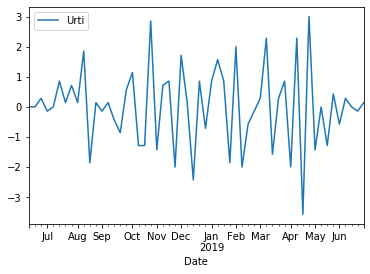

In [383]:
df_weekly.plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
X=df_weekly['Urti'].values
result=adfuller(X)
print("ADF Statistic: %f" % result[0])
print("p-value:  %f" % result[1])
print('Critical values: ')
for key,value in result[4].items():
    print("\t%s: %.3f" % (key,value))
if result[0] < result[4]["5%"]:
    print("Reject Ho - Time Series is stationary")
else:
    print("Failed to reject Ho - Time Series is not stationary")

In [384]:
df_weekly.size

56

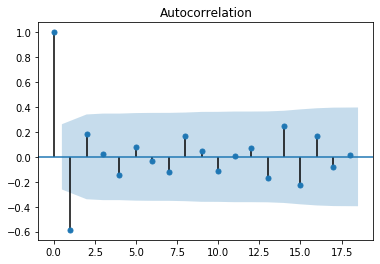

In [385]:
plot_acf(df_weekly);

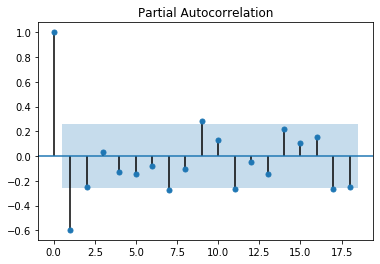

In [386]:
plot_pacf(df_weekly);

In [387]:
total=df_weekly
test_size=int(0.20*total.size)
train_size=total.size-test_size

In [388]:
test_size

11

In [389]:
train_size

45

In [390]:
total.size

56

In [391]:
train=total[:train_size]

In [392]:
test=total[train_size:]

In [393]:
train.size+test.size

56

In [419]:
train.head()

,Urti
Date,
2018-06-10,0.000000
2018-06-17,0.000000
2018-06-24,0.285714
2018-07-01,-0.142857
2018-07-08,0.000000


In [420]:
train.tail()

,Urti
Date,
2019-03-17,-1.571429
2019-03-24,0.285714
2019-03-31,0.857143
2019-04-07,-2.000000
2019-04-14,2.285714


In [416]:
test.head()

,Urti
Date,
2019-04-21,-3.571429
2019-04-28,3.000000
2019-05-05,-1.428571
2019-05-12,0.000000
2019-05-19,-1.285714


In [421]:
test.tail()

,Urti
Date,
2019-06-02,-0.571429
2019-06-09,0.285714
2019-06-16,0.000000
2019-06-23,-0.142857
2019-06-30,0.142857


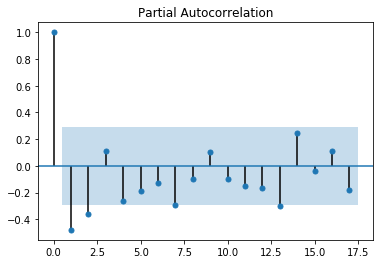

In [394]:
plot_pacf(train);

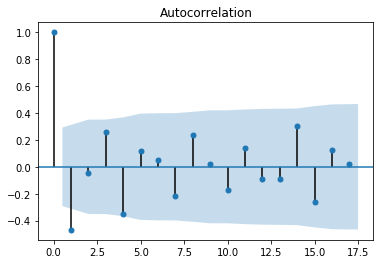

In [395]:
plot_acf(train);

In [396]:
from statsmodels.tsa.arima_model import ARMA

In [407]:
arma_model=ARMA(train,order=(13,2))
arma_model_fit=arma_model.fit()

In [408]:
arma_preds=arma_model_fit.predict(start=(train_size),end=(total.size-1))

In [409]:
arma_preds.size

11

In [410]:
arma_preds

2019-04-21   -1.677517
2019-04-28    0.484892
2019-05-05    0.852548
2019-05-12   -0.447169
2019-05-19   -0.041670
2019-05-26    0.156652
2019-06-02   -0.479507
2019-06-09    0.209556
2019-06-16    0.137791
2019-06-23   -0.277917
2019-06-30    0.341640
Freq: W-SUN, dtype: float64

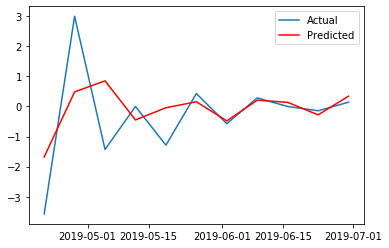

In [414]:
plt.plot(test,label='Actual')
plt.plot(arma_preds,color='red',label='Predicted')
plt.legend()

In [412]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score as acs

In [413]:
mse(y_true=test,y_pred=arma_preds)

1.5480648376364081

In [404]:
for i,j in zip(test,arma_preds):
    print(i,j)

Urti -0.6817407562645281


In [405]:
len(test)

11

In [406]:
test

,Urti
Date,
2019-04-21,-3.571429
2019-04-28,3.000000
2019-05-05,-1.428571
2019-05-12,0.000000
2019-05-19,-1.285714
2019-05-26,0.428571
2019-06-02,-0.571429
2019-06-09,0.285714
2019-06-16,0.000000


In [376]:
pred_values=arma_preds.values

In [377]:
test_values=test.values
test_values

array([[-3.57142857],
       [ 3.        ],
       [-1.42857143],
       [ 0.        ],
       [-1.28571429],
       [ 0.42857143],
       [-0.57142857],
       [ 0.28571429],
       [ 0.        ],
       [-0.14285714],
       [ 0.14285714]])

In [378]:
arma_preds[2]

1.6570846266189125

In [379]:
mean_err=0
c=0
for i in range(test.size):
    err=abs((test_values[i]-pred_values[i]))
    mean_err+=err
    c+=1

In [380]:
mean_err/c

array([1.13780857])

In [258]:
c

6